In [3]:
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict, OrderedDict
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import matplotlib.pylab as plt
import matplotlib as mpl
plt.rcParams['figure.figsize'] = (22.0, 10.0)
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc dark solarized

The base16_mplrc extension is already loaded. To reload it, use:
  %reload_ext base16_mplrc
Setting plotting theme to solarized-dark. Palette available in b16_colors


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
import cPickle as pickle
from fuzzywuzzy import fuzz, process
from fenaroli_parser.recipe_weights import compute_all_weights, match_ingredients, compute_single_avg_weight

In [7]:
from itertools import permutations, combinations
from fenaroli_parser.recipe_weights import compute_single_avg_weight, match_ingredients

In [8]:
from statsmodels.regression.linear_model import OLS

## comparing recipe weights to null model

In [11]:
with open('./comb_recipes.pkl', 'r') as f:
    comb_rec = pickle.load(f)

In [12]:
with open('./new_avg_recipe_weights.pkl', 'r') as f:
    avg_recipe = pickle.load(f)
with open('./new_avg_random_weights.pkl', 'r') as f:
    avg_random = pickle.load(f)

In [ ]:
compute_single_avg_weight(('bourbon', 'milk') com)

In [13]:
sorted(avg_recipe.values(), reverse = True)[:20]

sorted(avg_random.values(), reverse = True)[:20]

[178.0,
 178.0,
 177.0,
 177.0,
 177.0,
 177.0,
 177.0,
 177.0,
 170.0,
 170.0,
 161.0,
 161.0,
 161.0,
 161.0,
 161.0,
 161.0,
 155.0,
 155.0,
 155.0,
 155.0]

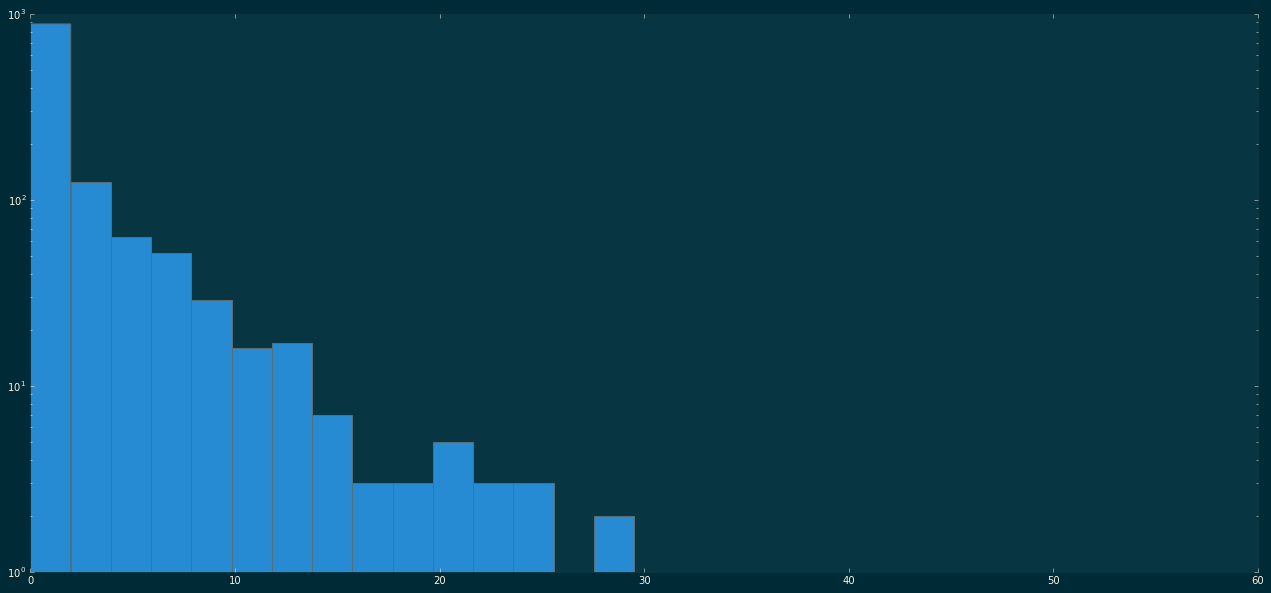

In [14]:
_ = plt.hist(avg_recipe.values(), bins = 30, log=True)

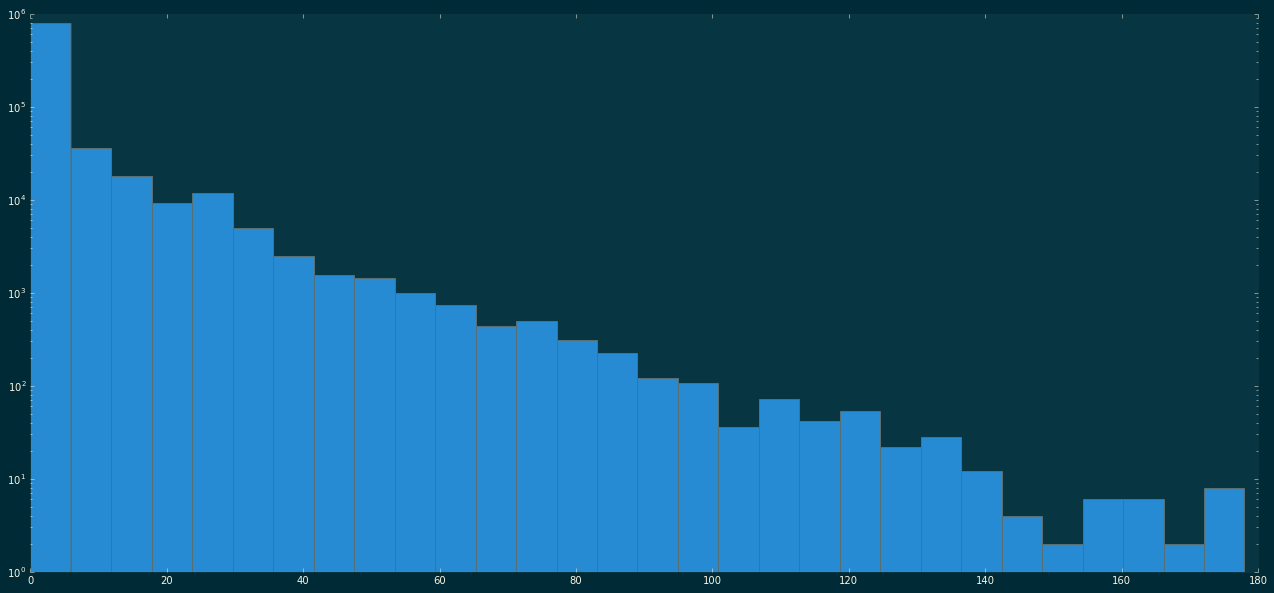

In [15]:
_ = plt.hist(avg_random.values(), bins = 30, log=True)

In [16]:
rand_weights = pd.Series(avg_random.values())
rand_keys = pd.Series(avg_random.keys())
bin_indices = pd.cut(rand_weights, 30)

In [17]:
bin_lookup = pd.concat([rand_keys, bin_indices], axis =1 )
bin_lookup.columns =['pair', 'bin']
bin_lookup = bin_lookup.set_index('pair')
# bin_lookup

In [18]:
bin_dict = bin_lookup['bin'].to_dict()

In [19]:
def null_fractions(pair_list):
    in_rec = defaultdict(int)
    tot_numb_in_bin = defaultdict(int)
    for pair in pair_list:
        ingrds = pair.split(', ')
        pair_id = ingrds[0] + ', ' + ingrds[1]
        for recipe in comb_rec.values():
            if ingrds[0] in recipe and ingrds[1] in recipe:
                in_rec[bin_dict[pair_id]] += 1
            tot_numb_in_bin[bin_dict[pair_id]] += 1
        fractions = {k: float(in_rec[k])/tot_numb_in_bin[k] for k in tot_numb_in_bin}
    return fractions

In [20]:
bin_fracts= null_fractions(rand_keys)

KeyboardInterrupt: 

In [21]:
with open('bin_fracts.pkl', 'r') as f:
    bin_fracts = pickle.load(f)

In [22]:
import operator

In [23]:
def compute_bin_center(bin_id):    
    b_center = bin_id.split('(')[1].split(', ')
    b_center = ((float(b_center[0]) + float(b_center[1].split(']')[0])))/2
    return b_center

In [24]:
bd = {compute_bin_center(k):v for k,v in bin_fracts.iteritems()}
ordered_bins = sorted(bd.items(), key=lambda t: t[0])

ordered_bins= [(ob[0], ob[1]/0.0001) for ob in ordered_bins if ob[1]>0]

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
xns = [i[0] for i in ordered_bins][:70]
yb = [i[1] for i in ordered_bins][:70]

lin_mod = LinearRegression()
lin_mod.fit(np.array(xns).reshape(-1,1), np.array(yb))

lin_reg = OLS(np.array(yb).reshape(-1,1), np.array(xns).reshape(-1,1))
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     111.7
Date:                Fri, 08 Jan 2016   Prob (F-statistic):           4.56e-16
Time:                        12:42:01   Log-Likelihood:                -2.8745
No. Observations:                  70   AIC:                             7.749
Df Residuals:                      69   BIC:                             9.997
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0071      0.001     10.567      0.000       0.006       0.008
==============================================================================
Omnibus:                       51.061   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.694
Skew:                           2.136   Prob(JB):                     4.88e-51
Kurtosis:                      10.823   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0, 150)

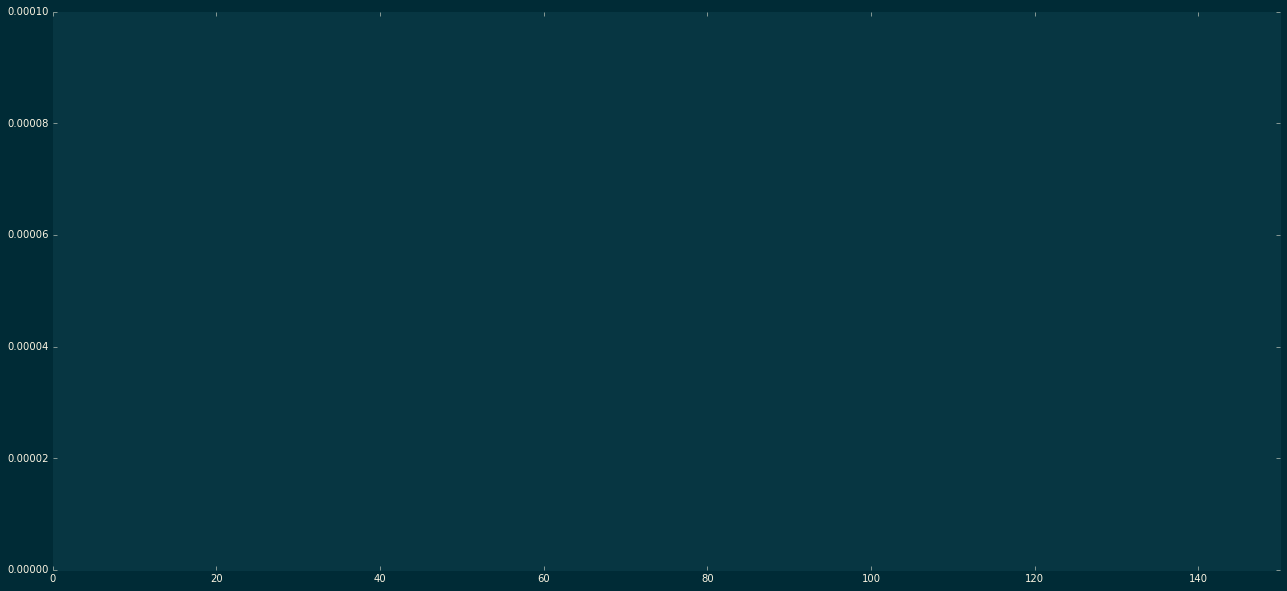

In [27]:
xns = [i[0] for i in ordered_bins]
yb = [i[1] for i in ordered_bins]
plt.scatter(xns, yb)
plt.ylim((0, 1*10**(-4)))
plt.xlim(0,150)

In [28]:
lin_reg = OLS(yb, xns)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     139.2
Date:                Fri, 08 Jan 2016   Prob (F-statistic):           6.11e-19
Time:                        12:42:04   Log-Likelihood:                -65.349
No. Observations:                  78   AIC:                             132.7
Df Residuals:                      77   BIC:                             135.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0135      0.001     11.799      0.000       0.011       0.016
==============================================================================
Omnibus:                       35.294   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.551
Skew:                           1.664   Prob(JB):                     2.90e-16
Kurtosis:                       6.308   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

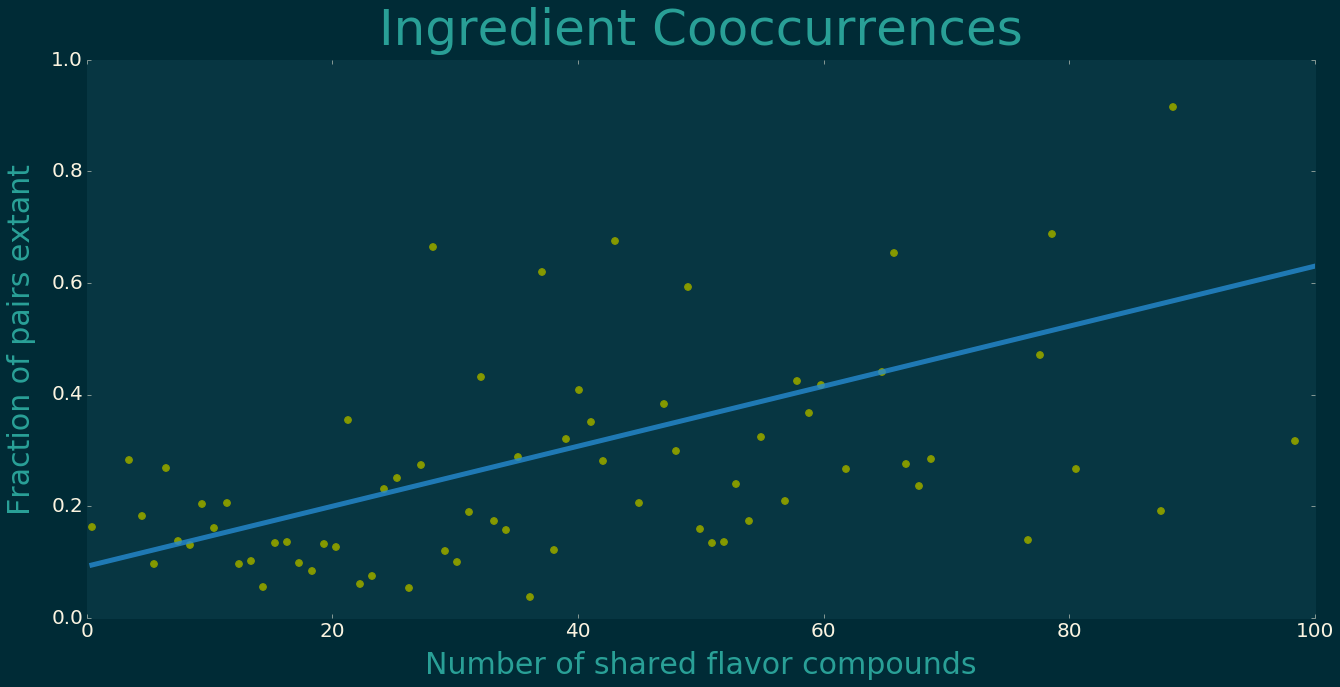

In [29]:
plt.scatter(xns, yb, color=b16_colors.g, marker = 'o', s=45)
plt.xlim((0,100))
plt.ylim((0, 1))
plt.plot(xns, lin_mod.predict(np.array(xns).reshape(-1,1)), color=b16_colors.b ,alpha=0.8, linewidth=5.0)
plt.title('Ingredient Cooccurrences', fontsize=50, verticalalignment='bottom', color = b16_colors.c)
plt.ylabel("Fraction of pairs extant", fontsize=30, labelpad=15, color = b16_colors.c)
plt.xlabel("Number of shared flavor compounds", fontsize=30, labelpad=10, color = b16_colors.c)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)